In [1]:
import glob
import os
from osgeo import gdal
import numpy as np
import pandas as pd
import pylab as plt
import plotly.graph_objects as go
import csv

In [2]:
# Glob together all of the Snow Fraction datasets.
albedo = glob.glob('*.h5')
albedo

['SierraAlbedo2001.h5',
 'SierraAlbedo2002.h5',
 'SierraAlbedo2003.h5',
 'SierraAlbedo2004.h5',
 'SierraAlbedo2005.h5',
 'SierraAlbedo2006.h5',
 'SierraAlbedo2007.h5',
 'SierraAlbedo2008.h5',
 'SierraAlbedo2009.h5',
 'SierraAlbedo2010.h5',
 'SierraAlbedo2011.h5',
 'SierraAlbedo2012.h5',
 'SierraAlbedo2013.h5',
 'SierraAlbedo2014.h5',
 'SierraAlbedo2015.h5',
 'SierraAlbedo2016.h5',
 'SierraAlbedo2017.h5',
 'SierraAlbedo2018.h5',
 'SierraAlbedo2019.h5']

In [3]:
# Get subdatasets of first snow fraction dataset ('SierraAlbedo2001.h5').
dataset = gdal.Open(albedo[0], gdal.GA_ReadOnly)


#Changes the selected dataset into an array.

albedo_array = dataset.ReadAsArray()

albedo_float = albedo_array.astype('float')
albedo_float[albedo_float == 65535] = np.nan

In [4]:
test = np.nanmean(albedo_float[20:,:]/10000) 
test

0.7535675744916424

In [ ]:
test2 = albedo_float[20:,:]/10000

mtest = np.nanmean(test2)

mtest

0.7535675744916424

In [6]:
# Create an empty list to populate yearly for loop values with
mean_albedo = []
for i in range(len(albedo)):
    dataset = gdal.Open(albedo[i], gdal.GA_ReadOnly)


    #Changes the selected dataset into an array.
    albedo_array = dataset.ReadAsArray()

    albedo_float = albedo_array.astype('float')
    albedo_float[albedo_float == 65535] = np.nan
    #Create an empty list to populate daily mean values per year with
    new_list = []
    #Takes the sum of the average snow fraction area per cell per given day in a year
    for j in range(len(albedo_float)):
        
        div = albedo_float[j:,:]/10000
        total_d = np.nanmean(div) 
        #Appends daily values to list
        new_list.append(total_d)
    #Appends yearly values to list. 
    mean_albedo.append(new_list)

In [6]:
# Create empty lists for row names and col names
row_names = []
col_names = []
# Create names for each day
for i in range(366) :
    col_names.append('Day ' + str(i + 1))
# Create names for year 
for j in range(len(albedo)):
    row_names.append(str(j + 2001))
#Create dataframe and append with names. 
albedo_df = pd.DataFrame(mean_albedo, index = row_names)
#Tranpose dataframe so years are columns and days are rows.
albedo_df = pd.DataFrame.transpose(albedo_df)

NameError: name 'albedo' is not defined

In [13]:
albedo_df.to_csv('albedo_rates.csv')

AttributeError: '_csv.reader' object has no attribute 'to_csv'

In [23]:
albedo_df = pd.read_csv (r'albedo_rates.csv')

IndexError: string index out of range

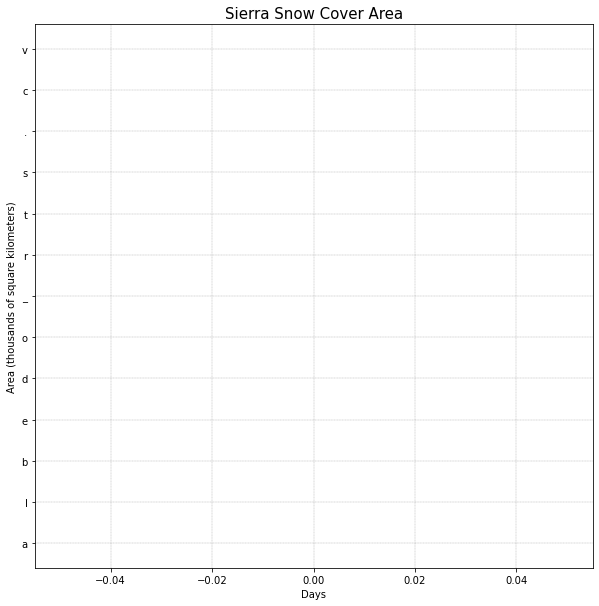

In [7]:
plt.figure(figsize=(10, 10))
plt.title('Sierra Snow Cover Area', fontsize = 15)
plt.xlabel('Days')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
plt.ylabel('Area (thousands of square kilometers)')
for i in range (18):
    plt.plot(albedo_df[i], label = i + 2001 )
plt.legend()
plt.show()

In [24]:
#Now need to convert NA Values for non-leap years
albedo_df = albedo_df.fillna(0)
albedo_df
# Next, need to create a single column of mean values. 
#albedo_df['Average Snow Cover'] = albedo_df.mean(axis = 1)

,Unnamed: 0,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,0,0.753892,0.771315,0.745700,0.772998,0.761415,0.762492,0.762376,0.763493,0.737907,0.775153,0.747911,0.759543,0.769590,0.778952,0.751131,0.781757,0.773072,0.767671,0.778525
1,1,0.753895,0.771315,0.745699,0.772998,0.761417,0.762490,0.762374,0.763492,0.737901,0.775152,0.747900,0.759521,0.769590,0.778953,0.751130,0.781753,0.773071,0.767671,0.778525
2,2,0.753898,0.771315,0.745699,0.772997,0.761420,0.762489,0.762373,0.763491,0.737896,0.775148,0.747885,0.759471,0.769590,0.778954,0.751130,0.781749,0.773069,0.767670,0.778525
3,3,0.753901,0.771315,0.745698,0.772997,0.761422,0.762487,0.762371,0.763490,0.737891,0.775144,0.747869,0.759406,0.769591,0.778955,0.751129,0.781744,0.773068,0.767670,0.778524
4,4,0.753903,0.771315,0.745697,0.772996,0.761425,0.762486,0.762370,0.763488,0.737888,0.775141,0.747853,0.759344,0.769591,0.778957,0.751129,0.781740,0.773067,0.767670,0.778524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,361,0.638983,0.632695,0.596917,0.628008,0.611036,0.633663,0.548457,0.623059,0.637681,0.582645,0.625674,0.599029,0.573096,0.652264,0.472690,0.559326,0.621385,0.653106,0.656505
362,362,0.639221,0.632930,0.597191,0.628249,0.611283,0.633900,0.548762,0.623285,0.637916,0.582924,0.625918,0.599296,0.573377,0.652471,0.473042,0.559621,0.621631,0.653305,0.656730
363,363,0.639462,0.633166,0.597468,0.628493,0.611532,0.634138,0.549068,0.623513,0.638153,0.583205,0.626163,0.599565,0.573660,0.652680,0.473396,0.559918,0.621880,0.653505,0.656956
364,364,0.639704,0.633407,0.597746,0.628736,0.611784,0.634379,0.549377,0.623740,0.638391,0.583487,0.626410,0.599836,0.573949,0.652889,0.473752,0.560216,0.622130,0.653706,0.657184


In [25]:
# Create empty list to input with for loop
IQR_25 = []
IQR_75 = []
days = []
for i in range(len(albedo_df)): 
    #Takes the IQR of each day (25/75)
    Q1 = np.percentile(albedo_df.iloc[i], 25)
    Q3 = np.percentile(albedo_df.iloc[i], 75)
    #appends list with IQR outputs
    IQR_25.append(Q1)
    IQR_75.append(Q3)
    #Creates day list to append dataset with
    days.append(i + 1)


In [26]:
#Appends list for loop lists
albedo_df['IQR_25'] = IQR_25
albedo_df['IQR_75'] = IQR_75
albedo_df['IQR_50'] = ((albedo_df['IQR_75'] + albedo_df['IQR_25']) / 2)
albedo_df['days'] = days

In [51]:
#Lets take a look at the new dataset
albedo_df = albedo_df.drop(365)
albedo_df

,Unnamed: 0,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2014,2015,2016,2017,2018,2019,IQR_25,IQR_75,IQR_50,days
0,0,0.753892,0.771315,0.745700,0.772998,0.761415,0.762492,0.762376,0.763493,0.737907,...,0.778952,0.751131,0.781757,0.773072,0.767671,0.778525,0.753202,0.773017,0.763109,1
1,1,0.753895,0.771315,0.745699,0.772998,0.761417,0.762490,0.762374,0.763492,0.737901,...,0.778953,0.751130,0.781753,0.773071,0.767671,0.778525,0.758114,0.773591,0.765853,2
2,2,0.753898,0.771315,0.745699,0.772997,0.761420,0.762489,0.762373,0.763491,0.737896,...,0.778954,0.751130,0.781749,0.773069,0.767670,0.778525,0.758078,0.773589,0.765833,3
3,3,0.753901,0.771315,0.745698,0.772997,0.761422,0.762487,0.762371,0.763490,0.737891,...,0.778955,0.751129,0.781744,0.773068,0.767670,0.778524,0.758030,0.773587,0.765808,4
4,4,0.753903,0.771315,0.745697,0.772996,0.761425,0.762486,0.762370,0.763488,0.737888,...,0.778957,0.751129,0.781740,0.773067,0.767670,0.778524,0.757984,0.773585,0.765784,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,360,0.638746,0.632461,0.596644,0.627769,0.610790,0.633427,0.548154,0.622835,0.637447,...,0.652058,0.472340,0.559033,0.621141,0.652908,0.656282,0.593074,0.637772,0.615423,361
361,361,0.638983,0.632695,0.596917,0.628008,0.611036,0.633663,0.548457,0.623059,0.637681,...,0.652264,0.472690,0.559326,0.621385,0.653106,0.656505,0.593349,0.638006,0.615678,362
362,362,0.639221,0.632930,0.597191,0.628249,0.611283,0.633900,0.548762,0.623285,0.637916,...,0.652471,0.473042,0.559621,0.621631,0.653305,0.656730,0.593624,0.638243,0.615933,363
363,363,0.639462,0.633166,0.597468,0.628493,0.611532,0.634138,0.549068,0.623513,0.638153,...,0.652680,0.473396,0.559918,0.621880,0.653505,0.656956,0.593902,0.638480,0.616191,364


In [52]:
month_day = [31, 30, 31, 31, 28, 31, 30, 31, 30, 31, 31, 30]
new_list = []

j = 0 
for i in range(0,len(month_day)):
    j+=month_day[i]
    new_list.append(j)
     
print(new_list)

[31, 61, 92, 123, 151, 182, 212, 243, 273, 304, 335, 365]


In [53]:
# Create a list of years to graph. legend rank allows lets you order where the lines are located on the chart. 
for i in range(len(albedo)):
    print("""go.Scatter("""
        """name = '""" + str(i + 2001) + """', """
        """y = albedo_df['"""+ str(i + 2001) + """'], x = albedo_df['days'], """
        """mode = 'lines', legendrank = """ + str(19-i) + """),"""
    )

go.Scatter(name = '2001', y = mean_df['2001'], x = mean_df['days'], mode = 'lines', legendrank = 19),
go.Scatter(name = '2002', y = mean_df['2002'], x = mean_df['days'], mode = 'lines', legendrank = 18),
go.Scatter(name = '2003', y = mean_df['2003'], x = mean_df['days'], mode = 'lines', legendrank = 17),
go.Scatter(name = '2004', y = mean_df['2004'], x = mean_df['days'], mode = 'lines', legendrank = 16),
go.Scatter(name = '2005', y = mean_df['2005'], x = mean_df['days'], mode = 'lines', legendrank = 15),
go.Scatter(name = '2006', y = mean_df['2006'], x = mean_df['days'], mode = 'lines', legendrank = 14),
go.Scatter(name = '2007', y = mean_df['2007'], x = mean_df['days'], mode = 'lines', legendrank = 13),
go.Scatter(name = '2008', y = mean_df['2008'], x = mean_df['days'], mode = 'lines', legendrank = 12),
go.Scatter(name = '2009', y = mean_df['2009'], x = mean_df['days'], mode = 'lines', legendrank = 11),
go.Scatter(name = '2010', y = mean_df['2010'], x = mean_df['days'], mode = 'lines'

In [63]:
#Plot the figure. 
fig2 = go.Figure([

#create median line
go.Scatter(
    name = 'Median',
    y = albedo_df['IQR_50'],
    x = albedo_df['days'],
    mode = 'lines',
    legendgroup = 'IQR',
    legendgrouptitle_text="<b>Interquartile Range</b>",
    legendrank = 20,
    line=dict(color='rgb(31, 119, 180)'),
),
#Create IQR 75 line
go.Scatter(
        name = 'IQR 75',
        y = albedo_df['IQR_75'],
        x = albedo_df['days'],
        mode='lines',
        marker=dict(color="#444"),
        line=dict(width=0),
        legendgroup = 'IQR',
        showlegend = False
    ),
    #Create IQR 25 fill 
    go.Scatter(
        name='IQR 25',
        y = albedo_df['IQR_25'],
        x = albedo_df['days'],
        marker=dict(color="#444"),
        line=dict(width=0),
        mode='lines',
        fillcolor='rgba(68, 68, 68, 0.3)',
        fill='tonexty',
        legendgroup = 'IQR',
        showlegend = False
    ),
    # go.Scatter(
    #     name = 'Average Snow Cover',
    #     y = albedo_df['Average Snow Cover'],
    #     x = albedo_df['days'],
    #     mode = 'lines',
    #     legendgroup = 'Average',
    #     legendgrouptitle_text = '<b>Average</b>',
    #     legendrank = 21
    # ),

#Create lines for each respective line 
go.Scatter(name = '2001', y = albedo_df['2001'], x = albedo_df['days'], mode = 'lines', legendrank = 19),
go.Scatter(name = '2002', y = albedo_df['2002'], x = albedo_df['days'], mode = 'lines', legendrank = 18),
go.Scatter(name = '2003', y = albedo_df['2003'], x = albedo_df['days'], mode = 'lines', legendrank = 17),
go.Scatter(name = '2004', y = albedo_df['2004'], x = albedo_df['days'], mode = 'lines', legendrank = 16),
go.Scatter(name = '2005', y = albedo_df['2005'], x = albedo_df['days'], mode = 'lines', legendrank = 15),
go.Scatter(name = '2006', y = albedo_df['2006'], x = albedo_df['days'], mode = 'lines', legendrank = 14),
go.Scatter(name = '2007', y = albedo_df['2007'], x = albedo_df['days'], mode = 'lines', legendrank = 13),
go.Scatter(name = '2008', y = albedo_df['2008'], x = albedo_df['days'], mode = 'lines', legendrank = 12),
go.Scatter(name = '2009', y = albedo_df['2009'], x = albedo_df['days'], mode = 'lines', legendrank = 11),
go.Scatter(name = '2010', y = albedo_df['2010'], x = albedo_df['days'], mode = 'lines', legendrank = 10),
go.Scatter(name = '2011', y = albedo_df['2011'], x = albedo_df['days'], mode = 'lines', legendrank = 9),
go.Scatter(name = '2012', y = albedo_df['2012'], x = albedo_df['days'], mode = 'lines', legendrank = 8),
go.Scatter(name = '2013', y = albedo_df['2013'], x = albedo_df['days'], mode = 'lines', legendrank = 7),
go.Scatter(name = '2014', y = albedo_df['2014'], x = albedo_df['days'], mode = 'lines', legendrank = 6),
go.Scatter(name = '2015', y = albedo_df['2015'], x = albedo_df['days'], mode = 'lines', legendrank = 5),
go.Scatter(name = '2016', y = albedo_df['2016'], x = albedo_df['days'], mode = 'lines', legendrank = 4),
go.Scatter(name = '2017', y = albedo_df['2017'], x = albedo_df['days'], mode = 'lines', legendrank = 3),
go.Scatter(name = '2018', y = albedo_df['2018'], x = albedo_df['days'], mode = 'lines', legendrank = 2),
go.Scatter(name = '2019', y = albedo_df['2019'], x = albedo_df['days'], mode = 'lines', legendrank = 1)

])

#fig2.show()
#data=fig1.data + fig2.data
#fig3 = go.Figure(data)

# Can change default "off" variables. Right now, the only variable visible is year_2001
variables_to_hide = [
'2001',
'2002',
'2003',
'2004',
'2005',
'2006',
'2007',
'2008',
'2009',
'2010',
'2011',
'2012',
'2013',
'2014',
'2015',
'2016',
'2017',
'2018'
]
fig2.for_each_trace(lambda trace: trace.update(visible="legendonly") 
                   if trace.name in variables_to_hide else ())

fig2.update_layout(
    title = "<b> Annual Average Snow Albedo Rates in the Sierra Nevada Region </b> <br> <sup>2001-2019</sup></br>",
    legend_title="<b>Year</b>",
    autosize=False,
    width=1200,
    height=700,
    template = 'none',
    font=dict(
        size=16),
    yaxis_range =[0.55,.8],
    xaxis_range = [1, 365],
xaxis = dict(
        tickmode = 'array',
        tickvals = [1, 31, 61, 92, 123, 151, 182, 212, 243, 273, 304, 335, 365],
        ticktext = ['<b>October</b>', '<b>November</b>', '<b>December</b>', '<b>January</b>', '<b>February</b>', '<b>March</b>', '<b>April</b>', '<b>May</b>', 
        '<b>June</b>', '<b>July', '<b>August</b>', "<b>September</b>", "<b>October</b>"],
        tickfont = dict(size=12))
)

fig2.update_xaxes(title_text = "", gridcolor = 'lightgrey', gridwidth = 0.1)
fig2.update_yaxes(title_text = "<b> Percentage </b>", 
    title_font = {"size": 15}, gridcolor = 'lightgrey', gridwidth = 0.1)

fig2.show()